In [1]:
# 사용 라이브러리 로드
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# 데이터로드 
mnist = fetch_openml('mnist_784')

mnist_data = mnist.data[:10000]
mnist_target = mnist.target[:10000]

# 데이터 구성 확인
print(mnist_data.shape)
print(mnist_target.shape)

(10000, 784)
(10000,)


In [3]:
# 데이터 분리
X_train, X_test, y_train, y_test=train_test_split(mnist_data, mnist_target, test_size=0.2)

In [4]:
# Decision Tree와 RandomForest 결과 비교(파라미터 기본값)
dt_clf = tree.DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

dt_pred = dt_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)

accuracy_dt = accuracy_score(y_test, dt_pred)
accuracy_rf = accuracy_score(y_test, rf_pred)

In [5]:
print('의사결정 트리 예측 정확도: {0:.4f}'.format(accuracy_dt))
print('랜덤 포레스트 예측 정확도: {0:.4f}'.format(accuracy_rf))

의사결정 트리 예측 정확도: 0.7860
랜덤 포레스트 예측 정확도: 0.9490


In [6]:
from pprint import pprint

# RandomForest 모델 기본 파라미터 값 확인
pprint(rf_clf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# 파라미터 설명
n_estimators : 트리개수(기본값100)
criterion 분할 기준 : 'gini' 또는 'entropy'
max_depth 트리의 최대 깊이(None은 무제한)
min_samples_split 노드를 분할하기 위한 최소 샘플 수
min_samples_leaf 리프노드에 필요한 최소 샘플 수 
max_features 각 노드에서 고려할 최대 특성 수 ('sqrt', 'log2', 등)
bootstrap 배깅(Bagging) 시 샘플 복원 추출 여부
random_state 난수 시드(결과 재현용)
n_jobs 병렬 처리에 사용할 CPU 코어 수 (None이면 1개, -1이면 모두 사용)
oob_score OOB(out-of-bag) 샘플로 검증여부

In [7]:
X_train.shape

(8000, 784)

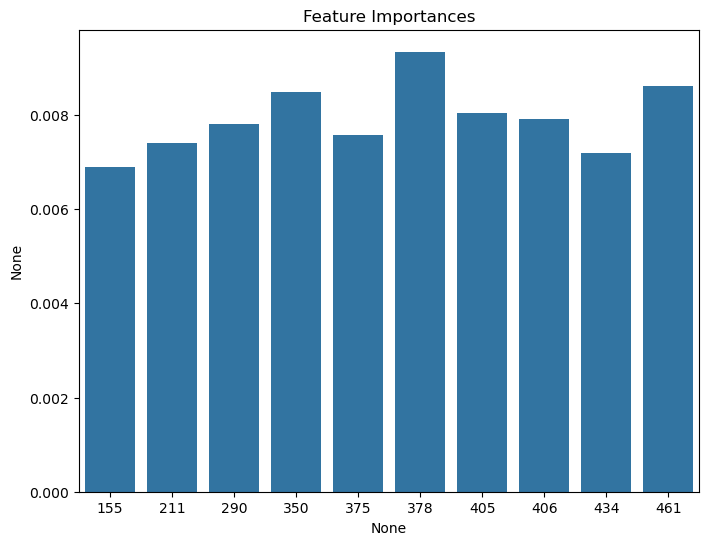

In [8]:
# 중요하게 활용된 변수 확인(상위 10개)
ft_importances_values = rf_clf.feature_importances_
ft_importances = pd.Series(ft_importances_values)

top10 = ft_importances.sort_values(ascending=False)[:10]
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=top10.index, y=top10)
plt.show()

# Random Forest 파라미터 튜닝

In [9]:
# Grid Search를 통한 최적의 파라미터 값 도출
rf_param_grid = {
    'n_estimators' : [100, 110, 120],
    'min_samples_leaf' : [1,2,3],
    'min_samples_split' : [2,3,4]
}

rf_clf = RandomForestClassifier(random_state = 0)
grid = GridSearchCV(rf_clf, param_grid = rf_param_grid, scoring='accuracy')

# 테스트 시간을 고려하여 1000건만 사용
X_train_g = X_train[:10000]
y_train_g = y_train[:10000]

grid.fit(X_train_g, y_train_g)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 110, 120]},
             scoring='accuracy')

In [ ]:
print('최고  평균 정확도 : {0:.4f}'.format(grid.best_score_))
print(grid.best_params_)